# Análisis exploratorio de datos

**Objetivos**:

1. Encontrar irregularidades en los datos y determinar qué transformaciones efectuar

    - Duplicados
    - Valores faltantes
    - Posibles errores de registro de datos
    - Imbalance de clases

2. Encontrar relaciones entre variables

    - Predictora - Objetivo
    - Predictora - Predictora

**Notas:**

- Distribución de edad de los registros
- Distribución de la presión
- Relación entre presión sanguínea y enfermedad A. coronaria
- Distribución de colesterol
- Relación entre colesterol y enfermedad A. coronaria
- Distribución de diabetes
- Relación entre diabetes y enfermedad A. coronaria
- Distribución del dolor de pecho
- Relación entre el dolor de pecho y enfermedad A. coronaria
- Distribución de sexo del paciente
- Rango numérico de presión sanguínea
- Colesterol no puede ser 0
    - Revisar el porcentaje de valores 0 en nuestros datos
- Distribución de FastingBS
- Distribución del ritmo cardiaco máximo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

sns.set()

## Perfilar estructura

- Tamaño de datos
- Datos faltantes / nulos
- Tipos de datos

In [2]:
datos = pd.read_csv("datos/heart.csv")
datos.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
datos.shape

(918, 12)

In [3]:
datos.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
datos.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
columnas_str = datos.select_dtypes(include="object").columns
datos[columnas_str] = datos[columnas_str].astype("category")
datos.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

## Separar y guardar datos de entrenamiento y prueba

In [10]:
entrenamiento_X,prueba_X,entrenamiento_y,prueba_y = train_test_split(
    datos.iloc[:,:-1], datos.iloc[:,-1],
    test_size=0.2, shuffle=True, random_state=42,
    stratify=datos.iloc[:,-1]
)

In [13]:
entrenamiento_X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
485,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat
486,55,M,ATA,110,214,1,ST,180,N,0.4,Up
117,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat
361,47,M,ASY,160,0,0,Normal,124,Y,0.0,Flat
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat


In [14]:
entrenamiento_y.head()

485    1
486    0
117    1
361    1
296    1
Name: HeartDisease, dtype: int64

In [15]:
entrenamiento_X.to_csv(
    "datos/entrenamiento_X.csv",
    index=False
)

In [16]:
entrenamiento_y.to_csv(
    "datos/entrenamiento_y.csv",
    index=False
)
prueba_X.to_csv(
    "datos/prueba_X.csv",
    index=False
)
prueba_y.to_csv(
    "datos/prueba_y.csv",
    index=False
)

## Perfilar contenido

### Categorías, duplicados, Datos faltantes, Rangos numéricos

#### Categorías

In [27]:
columnas_cat = datos.select_dtypes(include="category").columns
for col in columnas_cat:
    print(col)
    unicos = pd.unique(datos[col])
    print(unicos,'\n--------------')

Sex
['M', 'F']
Categories (2, object): ['F', 'M'] 
--------------
ChestPainType
['ATA', 'NAP', 'ASY', 'TA']
Categories (4, object): ['ASY', 'ATA', 'NAP', 'TA'] 
--------------
RestingECG
['Normal', 'ST', 'LVH']
Categories (3, object): ['LVH', 'Normal', 'ST'] 
--------------
ExerciseAngina
['N', 'Y']
Categories (2, object): ['N', 'Y'] 
--------------
ST_Slope
['Up', 'Flat', 'Down']
Categories (3, object): ['Down', 'Flat', 'Up'] 
--------------


#### Valores numéricos (presión sanguínea y colesterol)

In [31]:
(datos[datos["Cholesterol"]==0])["Cholesterol"].count()/datos.shape[0]

0.18736383442265794

In [34]:
datos["RestingBP"].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [36]:
(datos[datos["RestingBP"]==0])["RestingBP"].count()

1

- Asignar valores de colesterol con vecinos más cercanos.
- Asignar valor de presión sanguínea al valor "0" con vecinos más cercanos.

#### Duplicados

In [42]:
datos.duplicated().sum()

0

#### Rangos numéricos

In [40]:
columnas_num = entrenamiento_X.select_dtypes(include=["int64","float64"]).columns
entrenamiento_X[columnas_num].describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.848774,132.874659,203.227520,0.228883,136.377384,0.865123
std,9.440574,18.080330,108.402067,0.420400,25.832297,1.056964
min,29.000000,92.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,180.000000,0.000000,119.000000,0.000000
50%,55.000000,130.000000,225.000000,0.000000,138.000000,0.500000
75%,61.000000,141.000000,269.750000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000


In [41]:
entrenamiento_y.describe()

count    734.000000
mean       0.553134
std        0.497508
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

### Distribución de variables

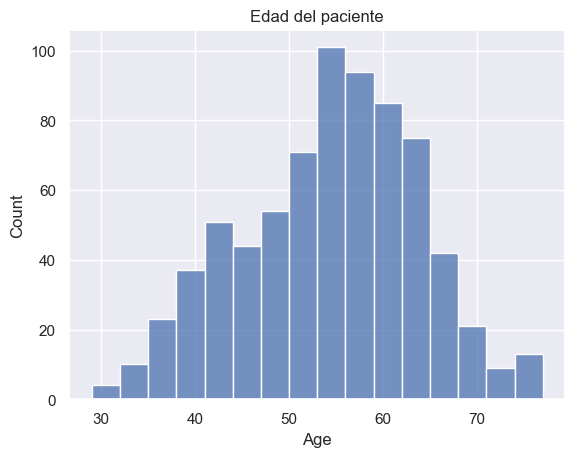

In [53]:
sns.histplot(
    data=entrenamiento_X,
    x="Age"
)
plt.title("Edad del paciente")
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_3660\3289123857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_sexo = entrenamiento_X.groupby("Sex").size()


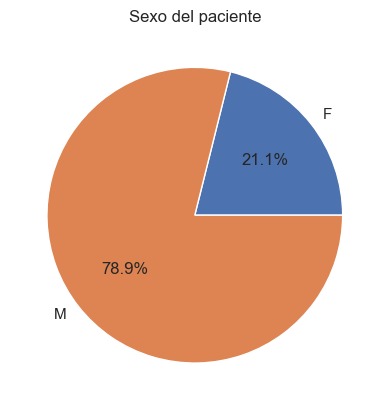

In [61]:
datos_sexo = entrenamiento_X.groupby("Sex").size()
plt.pie(
    datos_sexo,
    labels=list(datos_sexo.index),
    autopct='%1.1f%%'
)
plt.title("Sexo del paciente")
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_3660\3378044156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_chestpaintype = entrenamiento_X.groupby("ChestPainType").size()


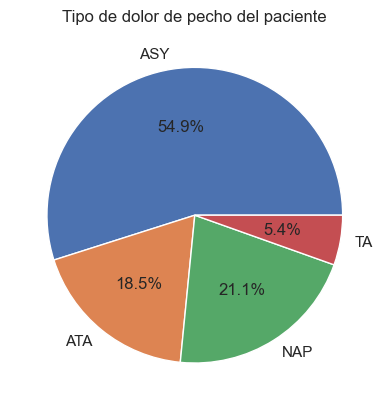

In [62]:
datos_chestpaintype = entrenamiento_X.groupby("ChestPainType").size()
plt.pie(
    datos_chestpaintype,
    labels=list(datos_chestpaintype.index),
    autopct='%1.1f%%'
)
plt.title("Tipo de dolor de pecho del paciente")
plt.show()

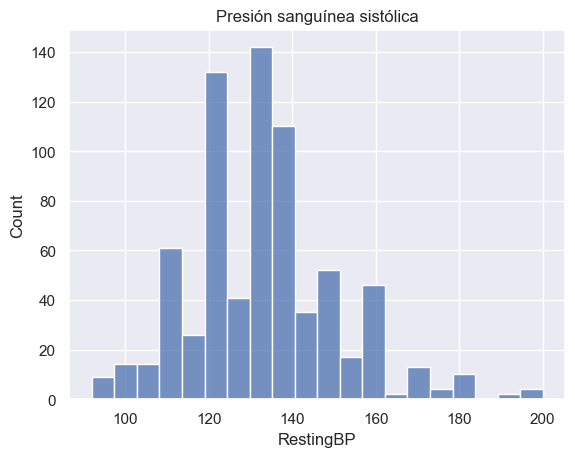

In [64]:
sns.histplot(
    data=entrenamiento_X,
    x="RestingBP",
    bins=20
)
plt.title("Presión sanguínea sistólica")
plt.show()

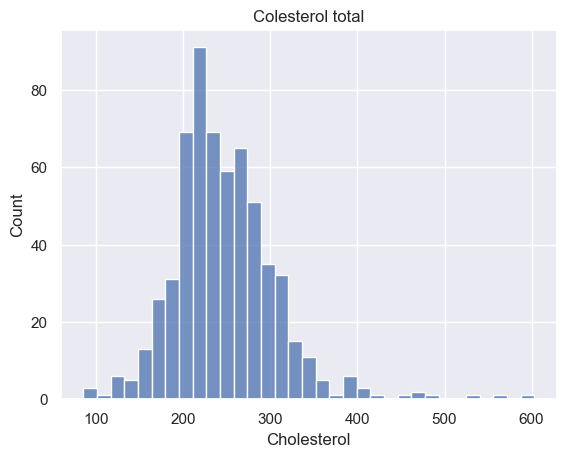

In [66]:
datos_colesterol = entrenamiento_X[entrenamiento_X["Cholesterol"]>0]
sns.histplot(
    data=datos_colesterol,
    x="Cholesterol"
)
plt.title("Colesterol total")
plt.show()

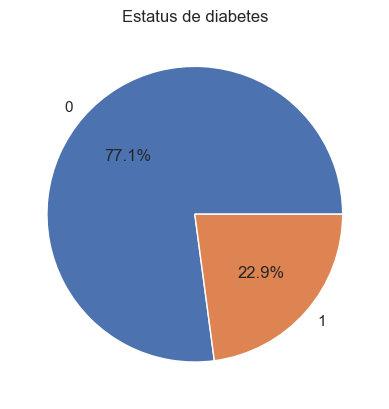

In [67]:
datos_diabetes = entrenamiento_X.groupby("FastingBS").size()
plt.pie(
    datos_diabetes,
    labels=list(datos_diabetes.index),
    autopct='%1.1f%%'
)
plt.title("Estatus de diabetes")
plt.show()

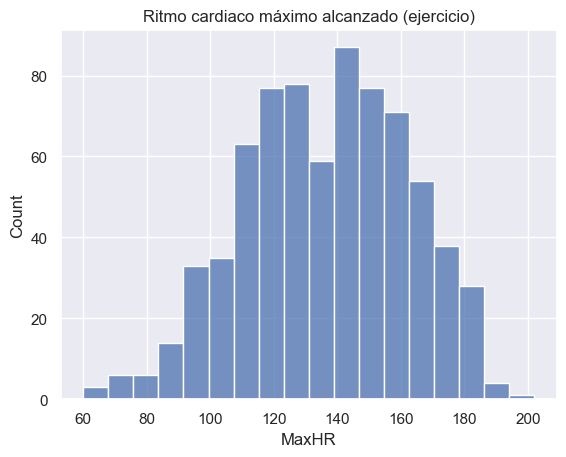

In [69]:
sns.histplot(
    data=entrenamiento_X,
    x="MaxHR"
)
plt.title("Ritmo cardiaco máximo alcanzado (ejercicio)")
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_3660\2156198912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_dolorpecho_ejercicio = entrenamiento_X.groupby("ExerciseAngina").size()


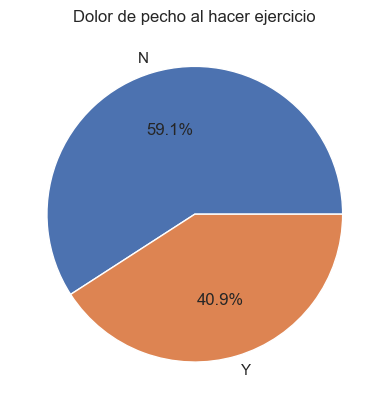

In [70]:
datos_dolorpecho_ejercicio = entrenamiento_X.groupby("ExerciseAngina").size()
plt.pie(
    datos_dolorpecho_ejercicio,
    labels=list(datos_dolorpecho_ejercicio.index),
    autopct='%1.1f%%'
)
plt.title("Dolor de pecho al hacer ejercicio")
plt.show()

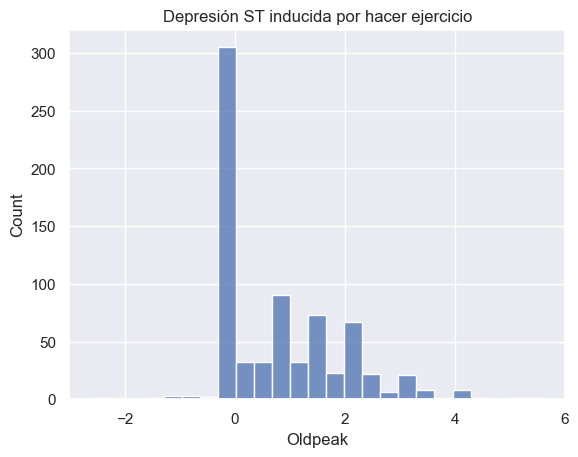

In [71]:
sns.histplot(
    data=entrenamiento_X,
    x="Oldpeak"
)
plt.title("Depresión ST inducida por hacer ejercicio")
plt.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_3660\909128242.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_pendienteST = entrenamiento_X.groupby("ST_Slope").size()


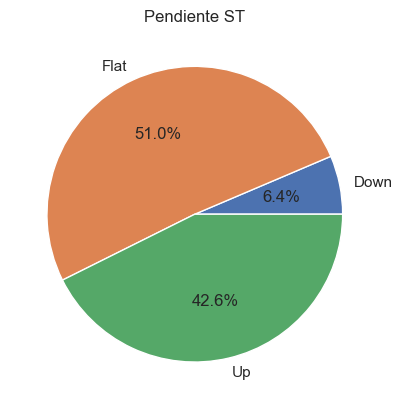

In [73]:
datos_pendienteST = entrenamiento_X.groupby("ST_Slope").size()
plt.pie(
    datos_pendienteST,
    labels=list(datos_pendienteST.index),
    autopct='%1.1f%%'
)
plt.title("Pendiente ST")
plt.show()

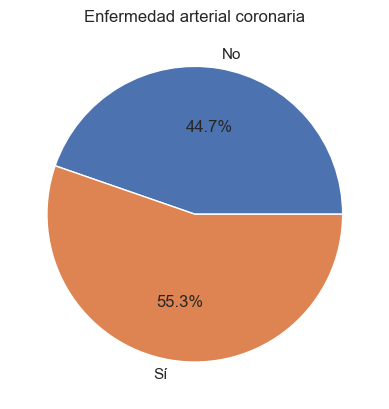

In [76]:
datos_EAC = [entrenamiento_y[entrenamiento_y==i].shape[0] for i in range(2)]

plt.pie(
    datos_EAC,
    labels=["No","Sí"],
    autopct='%1.1f%%'
)
plt.title("Enfermedad arterial coronaria")
plt.show()

### Detección de valores atípicos (1 variable)

- Colesterol
- Oldpeak

Regla de Tukey:

$$
x \in [\:p25\% - 1.5\cdot IQR,\: p75\% + 1.5\cdot IQR\:]
$$

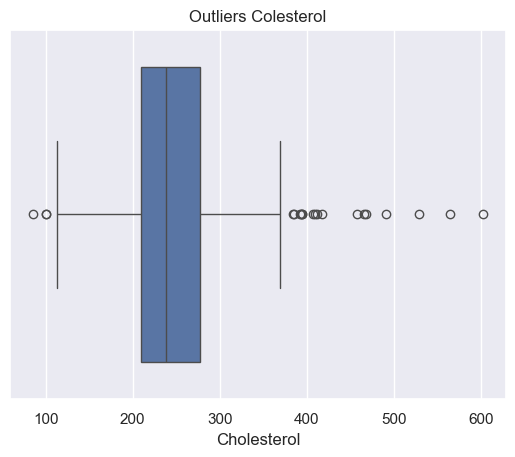

In [78]:
datos_colesterol = entrenamiento_X[entrenamiento_X["Cholesterol"]>0]
sns.boxplot(
    data=datos_colesterol,
    x="Cholesterol"
)
plt.title("Outliers Colesterol")
plt.show()

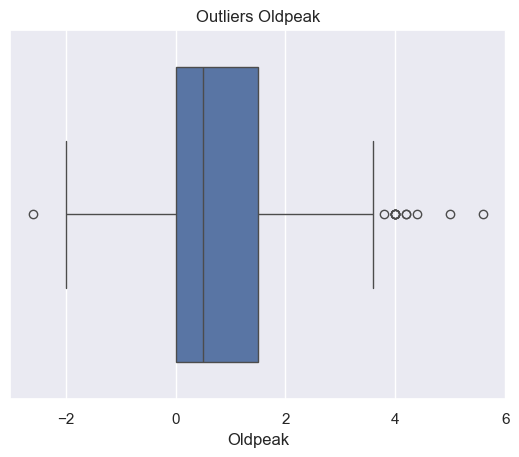

In [79]:
sns.boxplot(
    data=entrenamiento_X,
    x="Oldpeak"
)
plt.title("Outliers Oldpeak")
plt.show()

- Existen valores atípicos en Colesterol (ya sin ceros)
- Existen valores atípicos en Oldpeak

## Perfilar relaciones entre variables

**Predictora vs Predictora**

- Gráfica de pares (numéricas)
- Tablas de contingencia (categóricas)
    - ChestPainType vs RestingECG
    - ChestPainType vs ST_Slope
    - ST_Slope vs ExerciseAngina

**Predictora vs Objetivo**

- Edad vs enfermedad a. coronaria
- Sexo vs enfermedad a. coronaria
- Presión sanguínea vs enfermedad a. coronaria
- Colesterol vs enfermedad a. coronaria
- Diabetes vs enfermedad a. coronaria
- MaxHR vs enfermedad a. coronaria
- Dolor de pecho en ejercicio vs enfermedad a. coronaria

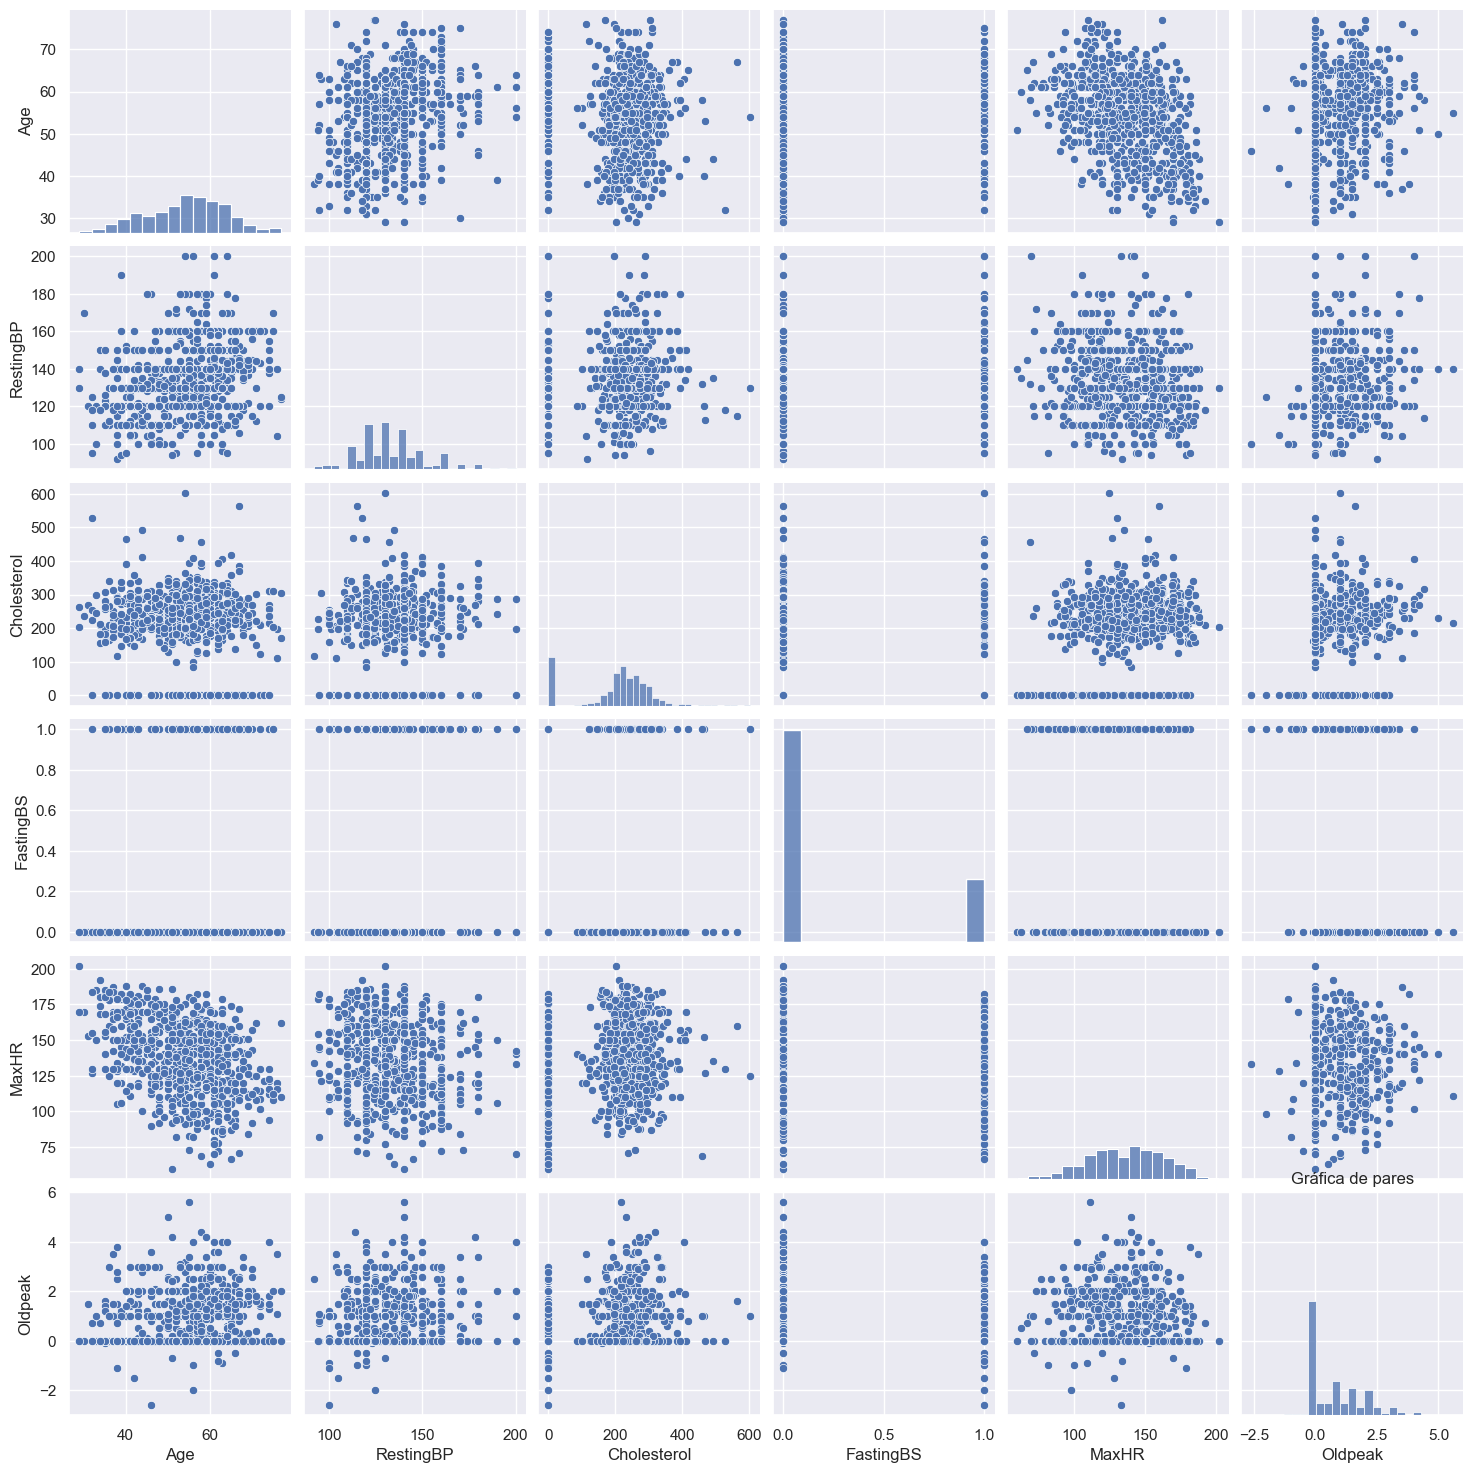

In [80]:
sns.pairplot(
    data=entrenamiento_X[columnas_num]
)
plt.title("Gráfica de pares")
plt.show()

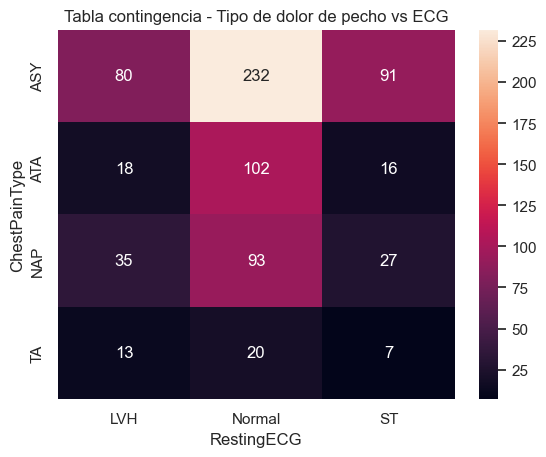

In [86]:
datos_tabla = pd.crosstab(
    entrenamiento_X["ChestPainType"],
    entrenamiento_X["RestingECG"]
)
sns.heatmap(datos_tabla, annot=True, fmt=".0f")
plt.title("Tabla contingencia - Tipo de dolor de pecho vs ECG")
plt.show()

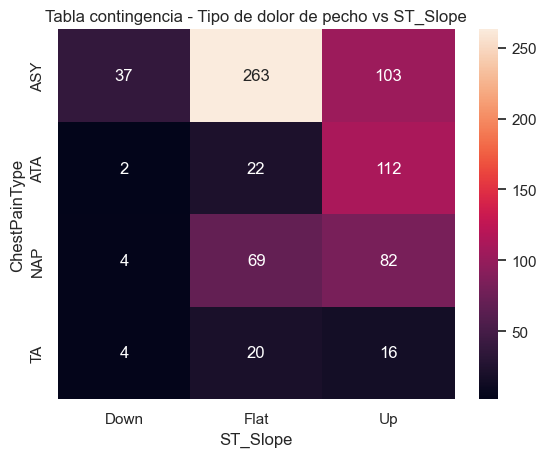

In [87]:
datos_tabla = pd.crosstab(
    entrenamiento_X["ChestPainType"],
    entrenamiento_X["ST_Slope"]
)
sns.heatmap(datos_tabla, annot=True, fmt=".0f")
plt.title("Tabla contingencia - Tipo de dolor de pecho vs ST_Slope")
plt.show()

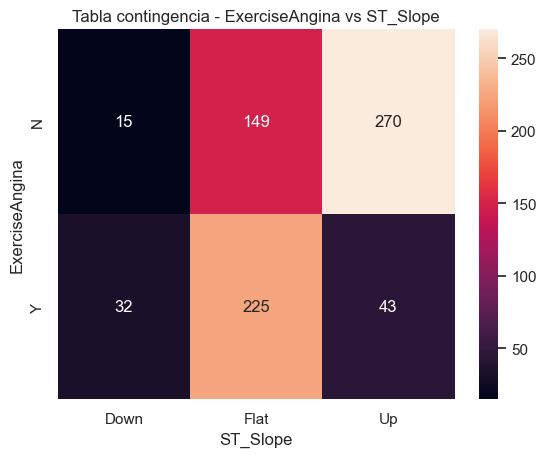

In [88]:
datos_tabla = pd.crosstab(
    entrenamiento_X["ExerciseAngina"],
    entrenamiento_X["ST_Slope"]
)
sns.heatmap(datos_tabla, annot=True, fmt=".0f")
plt.title("Tabla contingencia - ExerciseAngina vs ST_Slope")
plt.show()

### Predictoras vs Objetivo

In [90]:
datos_entrenamiento = entrenamiento_X.copy()
datos_entrenamiento["HeartDisease"] = entrenamiento_y.copy()

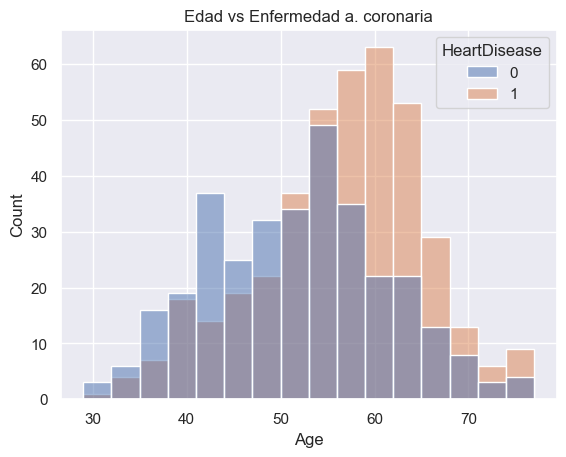

In [91]:
sns.histplot(
    data=datos_entrenamiento,
    x="Age", hue="HeartDisease"
)
plt.title("Edad vs Enfermedad a. coronaria")
plt.show()

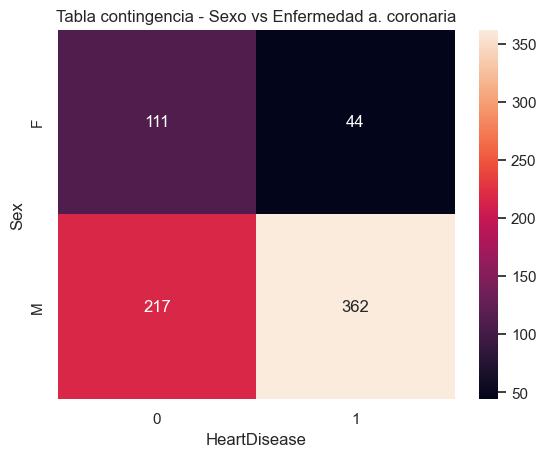

In [92]:
datos_tabla = pd.crosstab(
    datos_entrenamiento["Sex"],
    datos_entrenamiento["HeartDisease"]
)
sns.heatmap(datos_tabla, annot=True, fmt=".0f")
plt.title("Tabla contingencia - Sexo vs Enfermedad a. coronaria")
plt.show()

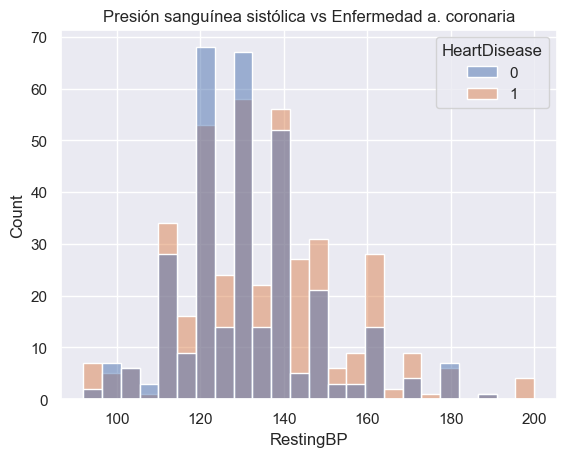

In [93]:
sns.histplot(
    data=datos_entrenamiento,
    x="RestingBP", hue="HeartDisease"
)
plt.title("Presión sanguínea sistólica vs Enfermedad a. coronaria")
plt.show()

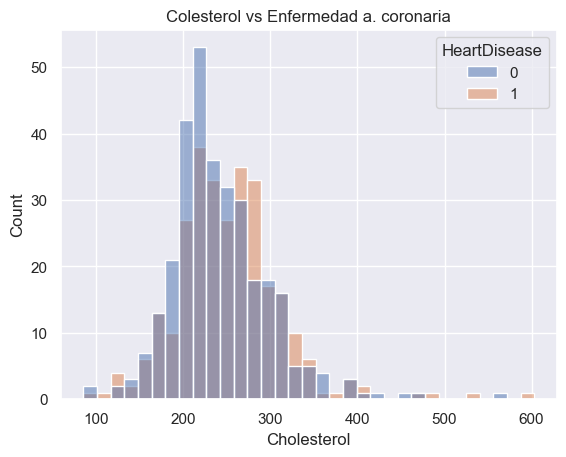

In [94]:
datos_colesterol = datos_entrenamiento[datos_entrenamiento["Cholesterol"]>0]
sns.histplot(
    data=datos_colesterol,
    x="Cholesterol", hue="HeartDisease"
)
plt.title("Colesterol vs Enfermedad a. coronaria")
plt.show()

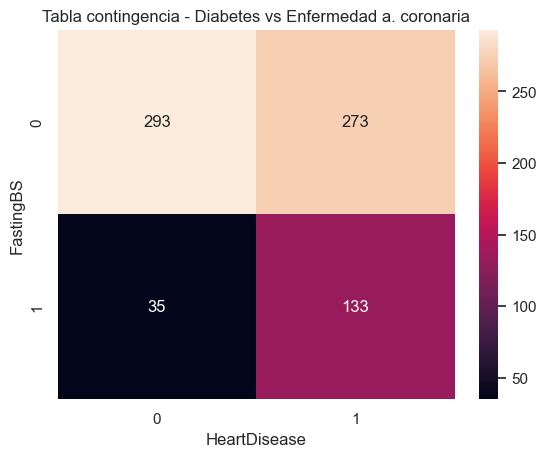

In [96]:
datos_tabla = pd.crosstab(
    datos_entrenamiento["FastingBS"],
    datos_entrenamiento["HeartDisease"]
)
sns.heatmap(datos_tabla, annot=True, fmt=".0f")
plt.title("Tabla contingencia - Diabetes vs Enfermedad a. coronaria")
plt.show()

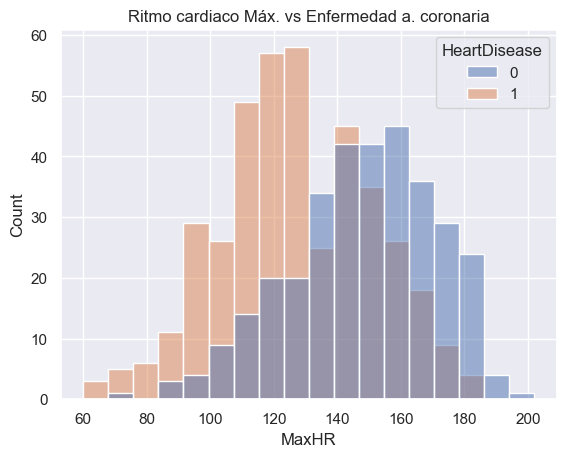

In [97]:
sns.histplot(
    data=datos_entrenamiento,
    x="MaxHR", hue="HeartDisease"
)
plt.title("Ritmo cardiaco Máx. vs Enfermedad a. coronaria")
plt.show()

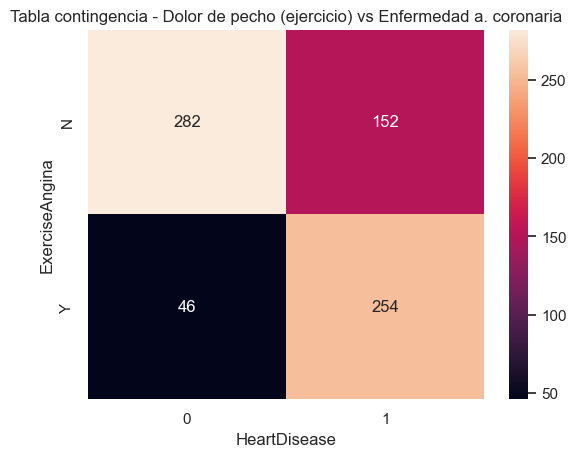

In [98]:
datos_tabla = pd.crosstab(
    datos_entrenamiento["ExerciseAngina"],
    datos_entrenamiento["HeartDisease"]
)
sns.heatmap(datos_tabla, annot=True, fmt=".0f")
plt.title("Tabla contingencia - Dolor de pecho (ejercicio) vs Enfermedad a. coronaria")
plt.show()